### Step 4: Visualize

!!!nota: TABLEAU è da fare?


In [1]:
import pandas as pd
from sqlalchemy import create_engine

DB_HOST = "bronto.ewi.utwente.nl"
DB_NAME = "dab_ds2425-2a_10"
DB_USER = "dab_ds2425-2a_10"
DB_PASS = "FYeq6/bll9ZFREsS"
DB_PORT = "5432"

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

product = pd.read_sql('SELECT * FROM ass2.product', engine)
customers = pd.read_sql('SELECT * FROM ass2.customer', engine)
sales = pd.read_sql('SELECT * FROM ass2.sales', engine)

print(product.head())
print(customers.head())
print(sales.head())


   productid              name      category
0          0   Mishi Kobe Niku  Meat/Poultry
1          1    Sirop d'érable    Condiments
2          2         Chocolade   Confections
3          3       Røgede sild       Seafood
4          4  Valkoinen suklaa   Confections
   customerid                  name  country
0           0  La corne d'abondance   France
1           1  Spécialités du monde   France
2           2   France restauration   France
3           3   Alfreds Futterkiste  Germany
4           4       The Cracker Box      USA
    orderdate  customerid  productid  sales
0  2009-10-09          37         56  244.3
1  2009-10-09          82         55  190.0
2  2009-10-09          82         38   36.0
3  2009-10-09          82         23  360.0
4  2009-10-09          40         14  500.0


In [2]:
import matplotlib.pyplot as plt

#sales_customers['Customer_Name'].value_counts().plt(kind='bar', figsize=(20,5))

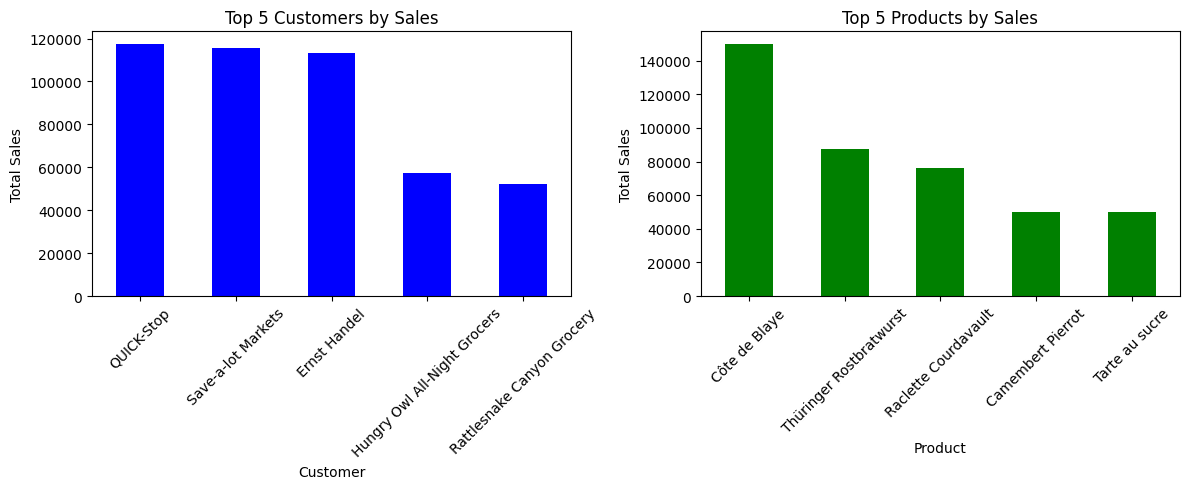

In [3]:
sales_customers= sales.merge(customers, on='customerid', how='left')
sales_products = sales.merge(product, on='productid', how='left')
top_customers = sales_customers.groupby('name')['sales'].sum().nlargest(5)
top_products = sales_products.groupby('name')['sales'].sum().nlargest(5)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
top_customers.plot(kind='bar', color='blue')
plt.title('Top 5 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
top_products.plot(kind='bar', color='green')
plt.title('Top 5 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()